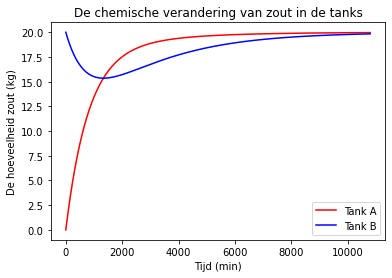

(19.964763364399634, 19.83639648563338)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

h = 1/60    # 1 minuut = stapgrootte

def forward_euler(num_steps=60*60*3):
    """
    Deze functie houdt in de gegeven tanks de hoeveelheid opgeloste zout bij na verloop van tijd.

   :param num_steps: Het aantal stappen dat de functie uitrekent om te controlleren hoeveel zout er in de beide tanks zit.
   :return: float
   """

    stroming_water_in_a = 6       # liter / min
    stroming_water_uit_a = 4      # liter / min
    stroming_water_van_ab = 3     # liter / min
    stroming_water_uit_ba = 1     # liter / min
    stroming_water_uit_b = 2      # liter / min

    tank_a = [100]      # 100 liter
    zout_a = [0]        # 0 kg zout in tank A
    tank_b = [100]      # 100 liter
    zout_b = [20]       # 20 kg zout in tank B


    for step in range(num_steps):

    # zoutconcentratie wordt per tank uitgerekend
        concentratie_a = zout_a[step]/tank_a[step]
        concentratie_b = zout_b[step]/tank_b[step]

        """"
            Forward euler methode toegepast om de verschillende zoutconcentraties met verschillende pijpleiding te combineren. Je kunt niet zomaar verschillende
            zoutconcentraties bij elkaar optellen als ze niet hetzelfde zijn. Hierdoor krijg je een goede inzicht welke welke in -en uitvoeren bij een bepaalde tank hoort.
        """
        euler_in_a = h * (stroming_water_in_a * 0.2 + stroming_water_uit_ba * (concentratie_b))
        euler_uit_a = h * (stroming_water_uit_a * (concentratie_a) + stroming_water_van_ab *(concentratie_a))
        euler_in_b = h * (stroming_water_van_ab * (concentratie_a))
        euler_uit_b = h * (stroming_water_uit_b * (concentratie_b) + stroming_water_uit_ba * (concentratie_b))
        zout_a.append(zout_a[step] + (euler_in_a - euler_uit_a))
        zout_b.append(zout_b[step] + (euler_in_b - euler_uit_b))
        tank_a.append(tank_a[step] + (stroming_water_in_a - stroming_water_uit_a - stroming_water_van_ab + stroming_water_uit_ba) * h)
        tank_b.append(tank_b[step] + (stroming_water_van_ab - stroming_water_uit_ba - stroming_water_uit_b) * h)
        # huidige + in - uit
    return(tank_a, zout_a, tank_b, zout_b)

tank_a, zout_a, tank_b, zout_b = forward_euler()

plt.plot(zout_a, 'r', label='Tank A')
plt.plot(zout_b, 'b', label='Tank B')
plt.legend()
plt.title("De chemische verandering van zout in de tanks")
plt.xlabel("Tijd (min)")
plt.ylabel("De hoeveelheid zout (kg)")

plt.show()
print()

# na verloop van tijd blijft de hoeveelheid zout in beide tanks gelijk
zout_a[-1], zout_b[-1]